# Linear Regression Analyses

In [1]:
from scripts.utils import *
from funcs.linear_models import *
from funcs.plots import Fig4p50

### Load and concatenate data

In [2]:
# set path
data_path = get_path('dataframes')

In [3]:
threshold_data = pd.read_pickle(os.path.join(data_path, 'thresholds-100_freqs.pkl'))[
    ['participant', 'paradigm', 'pred', 'mean_threshold']].drop_duplicates()

p50_data = pd.read_pickle(os.path.join(data_path, 'sigmoid_data.pkl'))[
    ['participant', 'paradigm', 'pred', 'distance_p50']].drop_duplicates()

FAR_data = pd.read_pickle(os.path.join(data_path, 'false_alarm_rates.pkl'))[
    ['participant', 'paradigm', 'pred', 'false_alarm_rate']].drop_duplicates()

gmsi_data = load_goldMSI_results()

age = load_age_info()

In [4]:
# Merge everything
all_data = pd.merge(threshold_data, p50_data, on=['paradigm', 'pred', 'participant'])
all_data = pd.merge(all_data, FAR_data, on=['paradigm', 'pred', 'participant'])
all_data = pd.merge(all_data, gmsi_data, on='participant')
all_data = pd.merge(all_data, age, on='participant')
# Keep only data from Continuous and Cluster
all_data = all_data[all_data.paradigm.isin(['Continuous', 'Cluster'])]

### Decisional bias

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.01 , p = 0.62    
T : R2: 0.01 , p = 0.619   
F : R2: 0.001, p = 0.875   
FT: R2: 0.092, p = 0.117   

---CLUSTER---
R : R2: 0.002, p = 0.837   
T : R2: 0.006, p = 0.693   
F : R2: 0.151, p = 0.041   *
FT: R2: 0.008, p = 0.653   


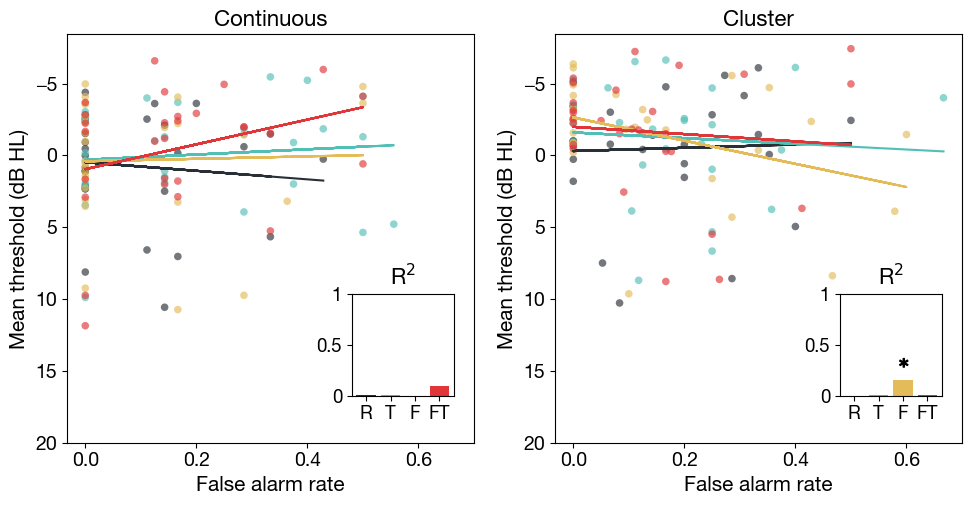

In [5]:
r_values = RSquared().fit_linear_model_to_chosen_data(all_data, 'false_alarm_rate', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(all_data, 'false_alarm_rate', 'mean_threshold', r_values, ['False alarm rate', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition

In [6]:
data_diff = compute_difference_w_random(all_data)


---CONTINUOUS---
T : R2: 0.08 , p = 0.146   
F : R2: 0.029, p = 0.39    
FT: R2: 0.276, p = 0.004   *

---CLUSTER---
T : R2: 0.051, p = 0.249   
F : R2: 0.0  , p = 0.995   
FT: R2: 0.004, p = 0.754   


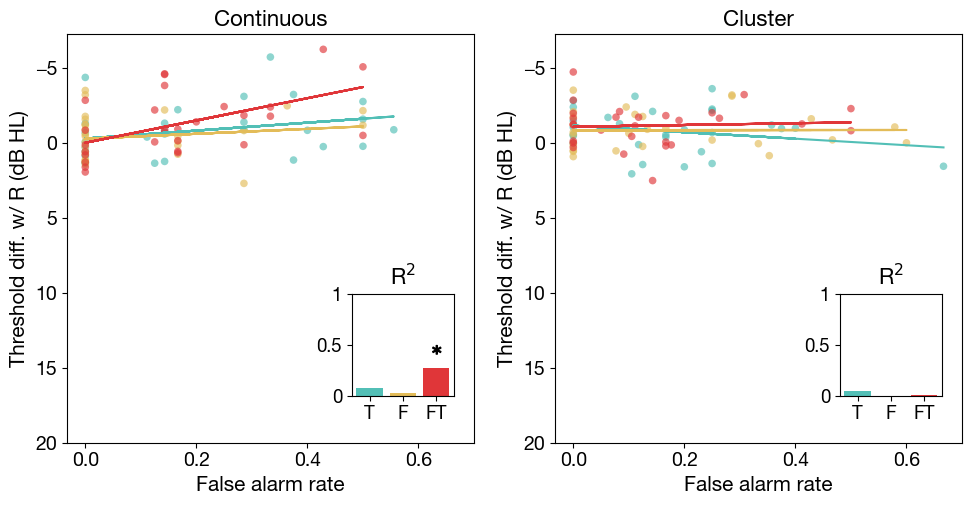

In [7]:
r_values = RSquared().fit_linear_model_to_chosen_data(data_diff, 'false_alarm_rate', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'false_alarm_rate', 'threshold_diff', r_values, ['False alarm rate', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s

In [8]:
data_noNan = remove_nan_participants(all_data)


---CONTINUOUS---
R : R2: 0.01 , p = 0.665   
T : R2: 0.189, p = 0.049   *
F : R2: 0.117, p = 0.129   
FT: R2: 0.614, p < 0.001   *

---CLUSTER---
R : R2: 0.081, p = 0.167   
T : R2: 0.16 , p = 0.047   *
F : R2: 0.015, p = 0.56    
FT: R2: 0.069, p = 0.206   


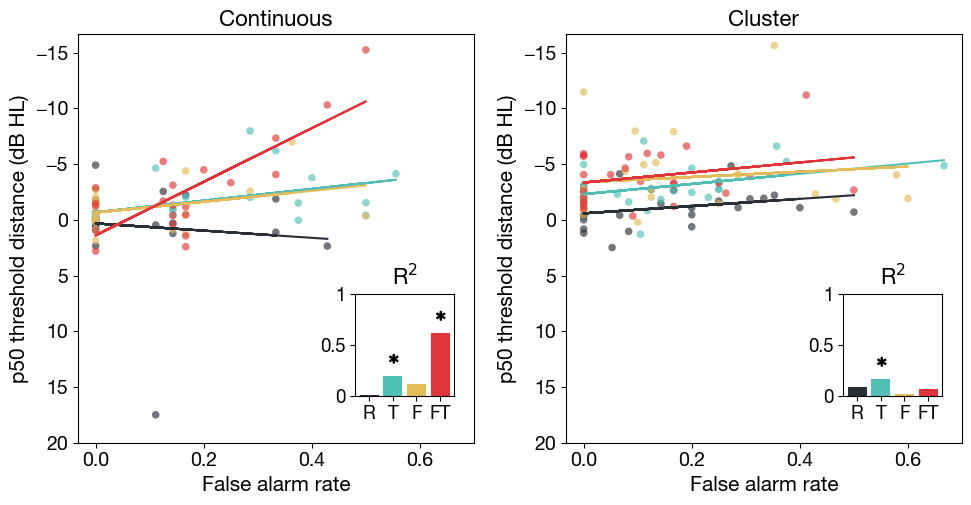

In [9]:
# Compute R2
r_values = RSquared().fit_linear_model_to_chosen_data(data_noNan, 'false_alarm_rate', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'false_alarm_rate', 'distance_p50', r_values, ['False alarm rate', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig4D-corr_p50_FAR.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.0  , p = 0.958   
F : R2: 0.001, p = 0.905   
FT: R2: 0.299, p = 0.01    *

---CLUSTER---
T : R2: 0.009, p = 0.649   
F : R2: 0.006, p = 0.706   
FT: R2: 0.091, p = 0.142   


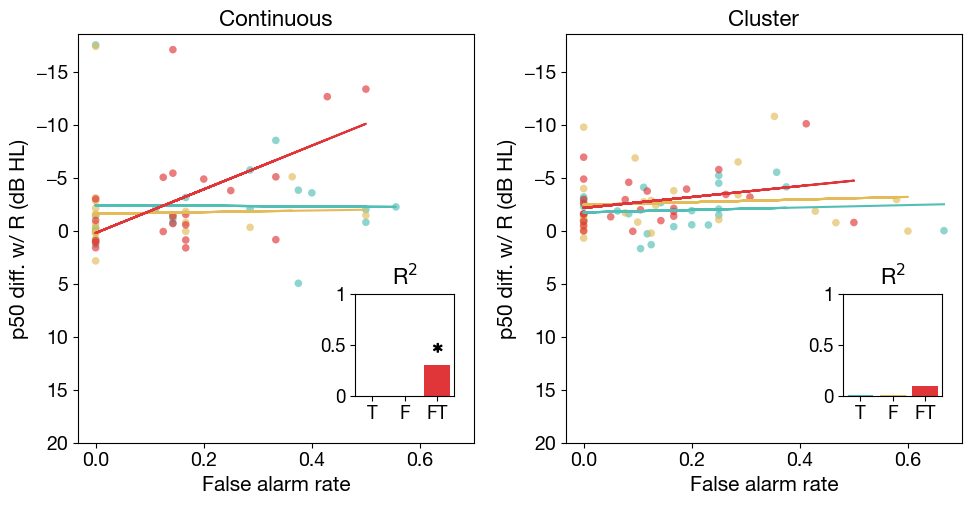

In [10]:
data_diff_noNan = remove_nan_participants(data_diff)

r_values = RSquared().fit_linear_model_to_chosen_data(data_diff_noNan, 'false_alarm_rate', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'false_alarm_rate', 'p50_diff', r_values, ['False alarm rate', 'p50 diff. w/ R (dB HL)'])

### Musical sophistication

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.1  , p = 0.1     
T : R2: 0.152, p = 0.04    *
F : R2: 0.137, p = 0.053   
FT: R2: 0.137, p = 0.052   

---CLUSTER---
R : R2: 0.137, p = 0.052   
T : R2: 0.152, p = 0.04    *
F : R2: 0.22 , p = 0.012   *
FT: R2: 0.19 , p = 0.02    *


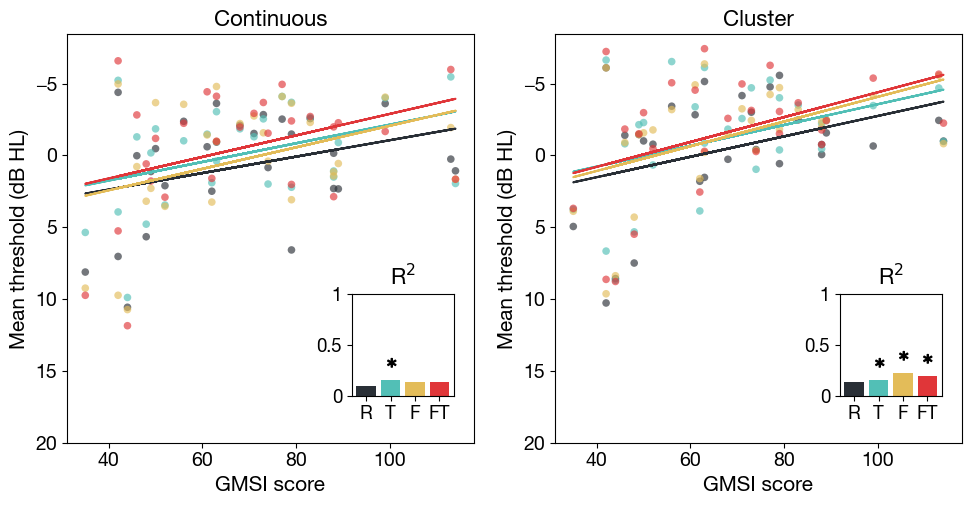

In [11]:
r_values = RSquared().fit_linear_model_to_chosen_data(all_data, 'gmsi', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(all_data, 'gmsi', 'mean_threshold', r_values, ['GMSI score', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition


---CONTINUOUS---
T : R2: 0.009, p = 0.636   
F : R2: 0.061, p = 0.203   
FT: R2: 0.031, p = 0.37    

---CLUSTER---
T : R2: 0.0  , p = 0.929   
F : R2: 0.064, p = 0.195   
FT: R2: 0.056, p = 0.227   


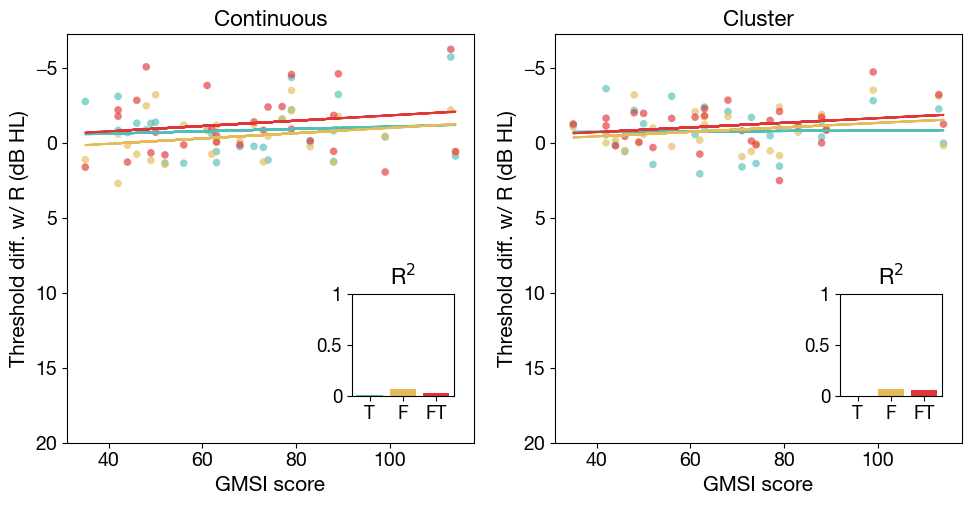

In [12]:
r_values = RSquared().fit_linear_model_to_chosen_data(data_diff, 'gmsi', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'gmsi', 'threshold_diff', r_values, ['GMSI score', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s


---CONTINUOUS---
R : R2: 0.022, p = 0.518   
T : R2: 0.003, p = 0.799   
F : R2: 0.029, p = 0.46    
FT: R2: 0.008, p = 0.697   

---CLUSTER---
R : R2: 0.009, p = 0.655   
T : R2: 0.002, p = 0.828   
F : R2: 0.014, p = 0.578   
FT: R2: 0.026, p = 0.445   


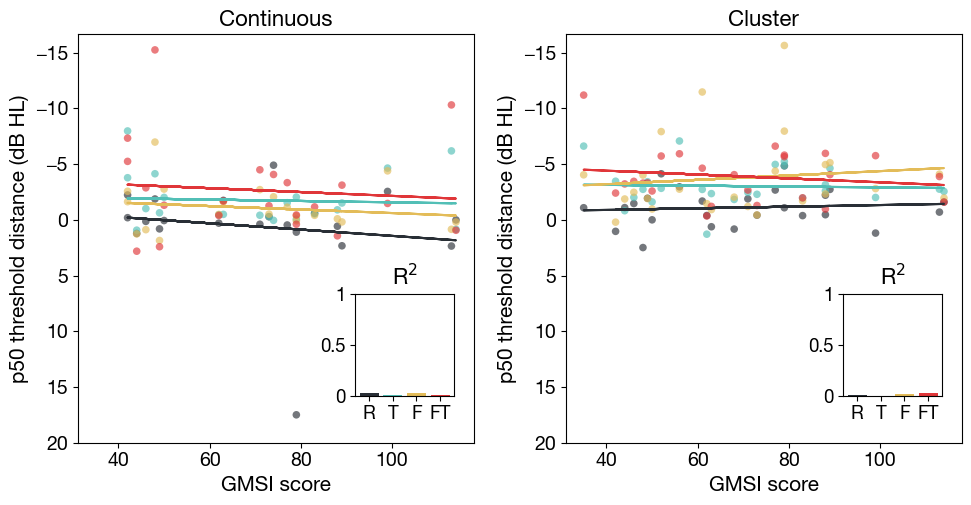

In [13]:
# Compute R2
r_values = RSquared().fit_linear_model_to_chosen_data(data_noNan, 'gmsi', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'gmsi', 'distance_p50', r_values, ['GMSI score', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig5B-corr_p50_GMSI.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.0  , p = 0.958   
F : R2: 0.001, p = 0.905   
FT: R2: 0.299, p = 0.01    *

---CLUSTER---
T : R2: 0.009, p = 0.649   
F : R2: 0.006, p = 0.706   
FT: R2: 0.091, p = 0.142   


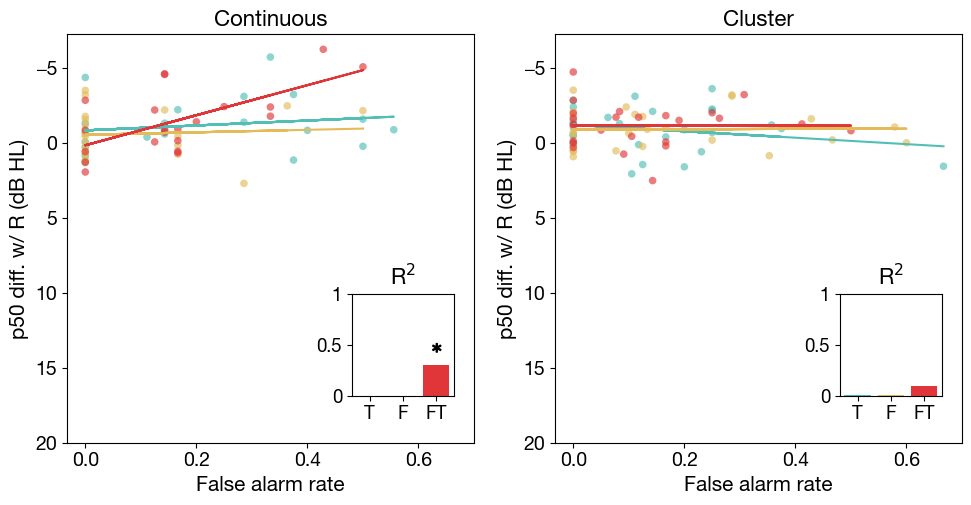

In [14]:
r_values = RSquared().fit_linear_model_to_chosen_data(data_diff_noNan, 'false_alarm_rate', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'false_alarm_rate', 'threshold_diff', r_values, ['False alarm rate', 'p50 diff. w/ R (dB HL)'])

### Age

##### Effect on thresholds


---CONTINUOUS---
R : R2: 0.073, p = 0.165   
T : R2: 0.081, p = 0.143   
F : R2: 0.055, p = 0.23    
FT: R2: 0.087, p = 0.127   

---CLUSTER---
R : R2: 0.16 , p = 0.035   *
T : R2: 0.19 , p = 0.02    *
F : R2: 0.093, p = 0.114   
FT: R2: 0.102, p = 0.097   


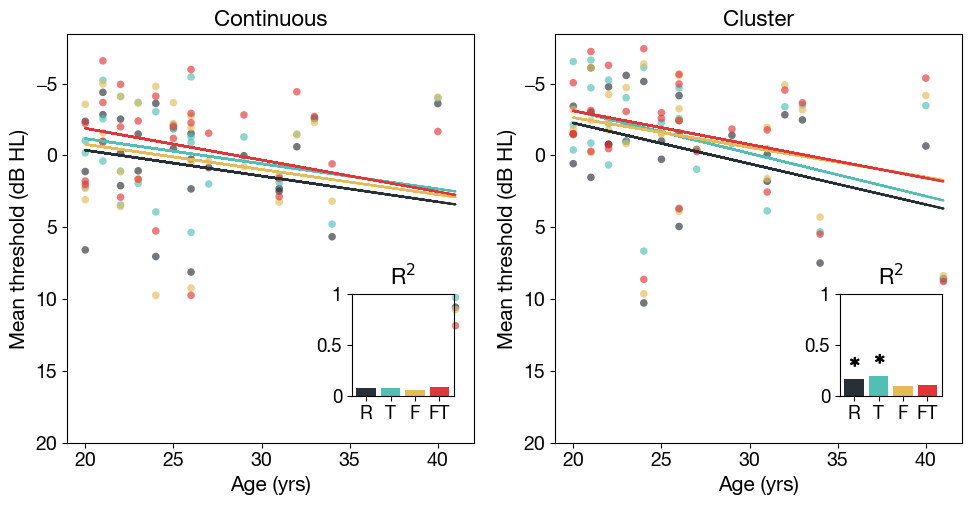

In [15]:
r_values = RSquared().fit_linear_model_to_chosen_data(all_data, 'age', 'mean_threshold')

fig = Fig4p50().plot_linear_regression(all_data, 'age', 'mean_threshold', r_values, ['Age (yrs)', 'Mean threshold (dB HL)'])

##### Effect on the difference in threshold with the random condition


---CONTINUOUS---
T : R2: 0.0  , p = 0.939   
F : R2: 0.0  , p = 0.928   
FT: R2: 0.012, p = 0.577   

---CLUSTER---
T : R2: 0.003, p = 0.78    
F : R2: 0.123, p = 0.067   
FT: R2: 0.042, p = 0.296   


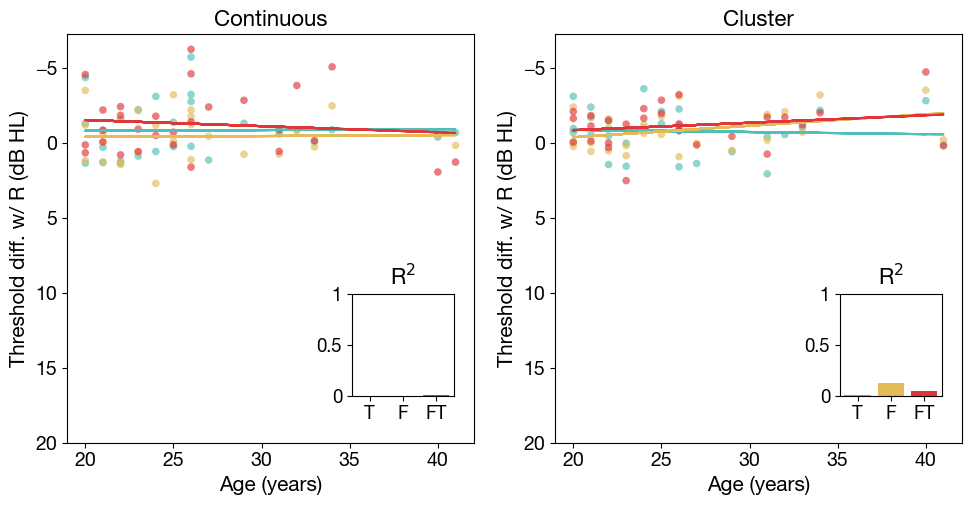

In [16]:
r_values = RSquared().fit_linear_model_to_chosen_data(data_diff, 'age', 'threshold_diff')

fig = Fig4p50().plot_linear_regression(data_diff, 'age', 'threshold_diff', r_values, ['Age (years)', 'Threshold diff. w/ R (dB HL)'])

##### Effect on p50s


---CONTINUOUS---
R : R2: 0.08 , p = 0.215   
T : R2: 0.002, p = 0.862   
F : R2: 0.064, p = 0.267   
FT: R2: 0.001, p = 0.894   

---CLUSTER---
R : R2: 0.124, p = 0.084   
T : R2: 0.253, p = 0.01    *
F : R2: 0.002, p = 0.814   
FT: R2: 0.0  , p = 0.992   


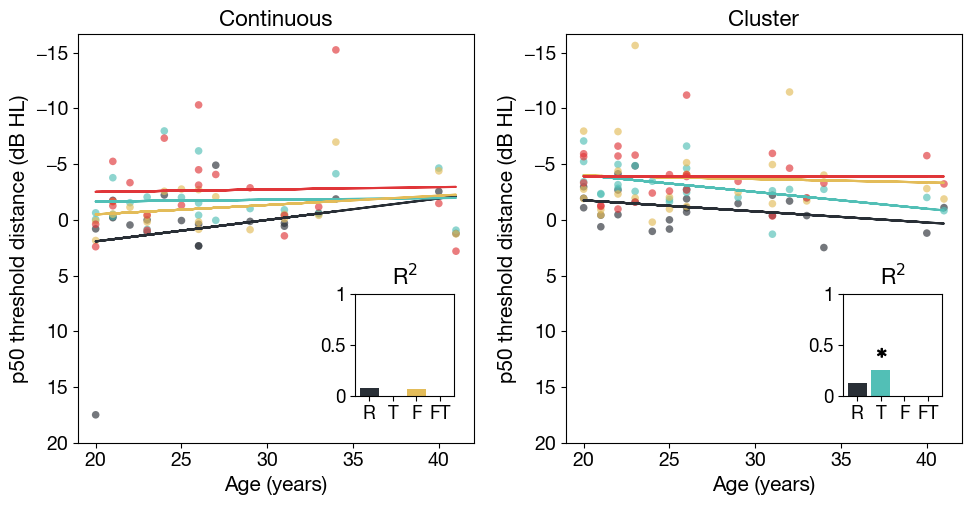

In [17]:
# Compute R2
r_values = RSquared().fit_linear_model_to_chosen_data(data_noNan, 'age', 'distance_p50')

fig = Fig4p50().plot_linear_regression(data_noNan, 'age', 'distance_p50', r_values, ['Age (years)', 'p50 threshold distance (dB HL)'])

fig.savefig(os.path.join(get_path('figures'), 'Fig5A-corr_p50_age.svg'))

##### Effect on the p50 difference with the random condition


---CONTINUOUS---
T : R2: 0.062, p = 0.275   
F : R2: 0.029, p = 0.464   
FT: R2: 0.041, p = 0.38    

---CLUSTER---
T : R2: 0.027, p = 0.436   
F : R2: 0.019, p = 0.509   
FT: R2: 0.063, p = 0.226   


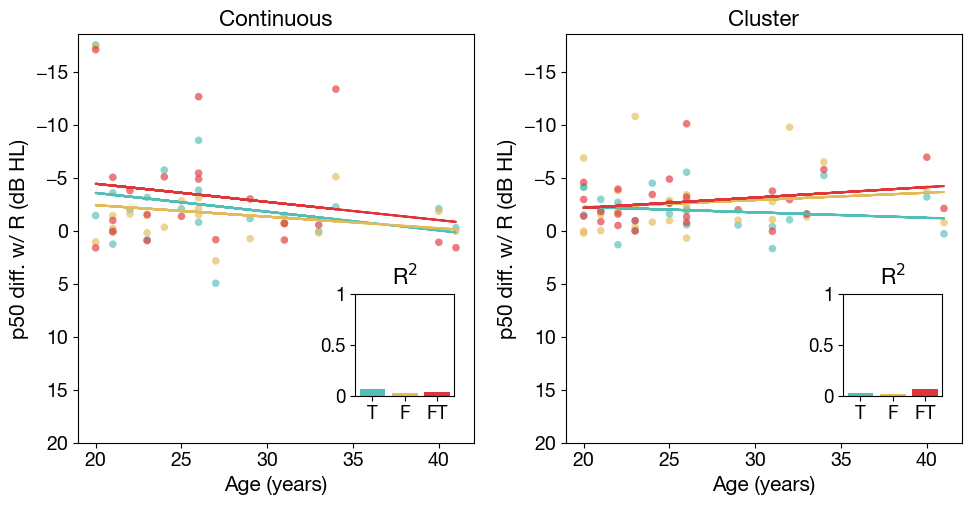

In [18]:
r_values = RSquared().fit_linear_model_to_chosen_data(data_diff_noNan, 'age', 'p50_diff')

fig = Fig4p50().plot_linear_regression(data_diff_noNan, 'age', 'p50_diff', r_values, ['Age (years)', 'p50 diff. w/ R (dB HL)'])